In [33]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [34]:
input_path = Path("../data/raw/gravity_speed_data.csv")
output_path = Path("../data/processed/cleaned_gravity_speed_data.csv")
output_path.parent.mkdir(parents=True, exist_ok=True)

print(f"Input file: {input_path}")

Input file: ..\data\raw\gravity_speed_data.csv


In [35]:
df = pd.read_csv(input_path)
df.head()

,mass_kg,radius_m,velocity_m_s,gravitational_dilation,velocity_dilation,combined_dilation,time_far_s,time_near_s,time_difference_s
0,6.620184e+29,5.356206e+09,8.128375e+07,1.0,1.038859,0.962595,1.0,0.962595,0.037405
1,8.862898e+29,8.749384e+09,1.207812e+08,1.0,1.092449,0.915374,1.0,0.915374,0.084626
2,2.994138e+29,2.869731e+09,6.245075e+07,1.0,1.022398,0.978093,1.0,0.978093,0.021907
3,4.302086e+29,6.169629e+09,1.997366e+08,1.0,1.340231,0.746140,1.0,0.746140,0.253860
4,3.116746e+29,2.609683e+09,1.579006e+08,1.0,1.176087,0.850277,1.0,0.850277,0.149723


In [36]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(f"Data cleaned: {df.shape[0]} rows and {df.shape[1]} columns after removing NaN values.")

Data cleaned: 1000 rows and 9 columns after removing NaN values.


In [37]:
c = 299_792_458  # Speed of light in m/s

conditions = (
    (df["velocity_m_s"] < c) &
    (df["mass_kg"] > 0) &
    (df["radius_m"] > 0) &
    (df["gravitational_dilation"] > 0) &
    (df["velocity_dilation"] > 0) &
    (df["combined_dilation"] > 0)
)

df = df[conditions]

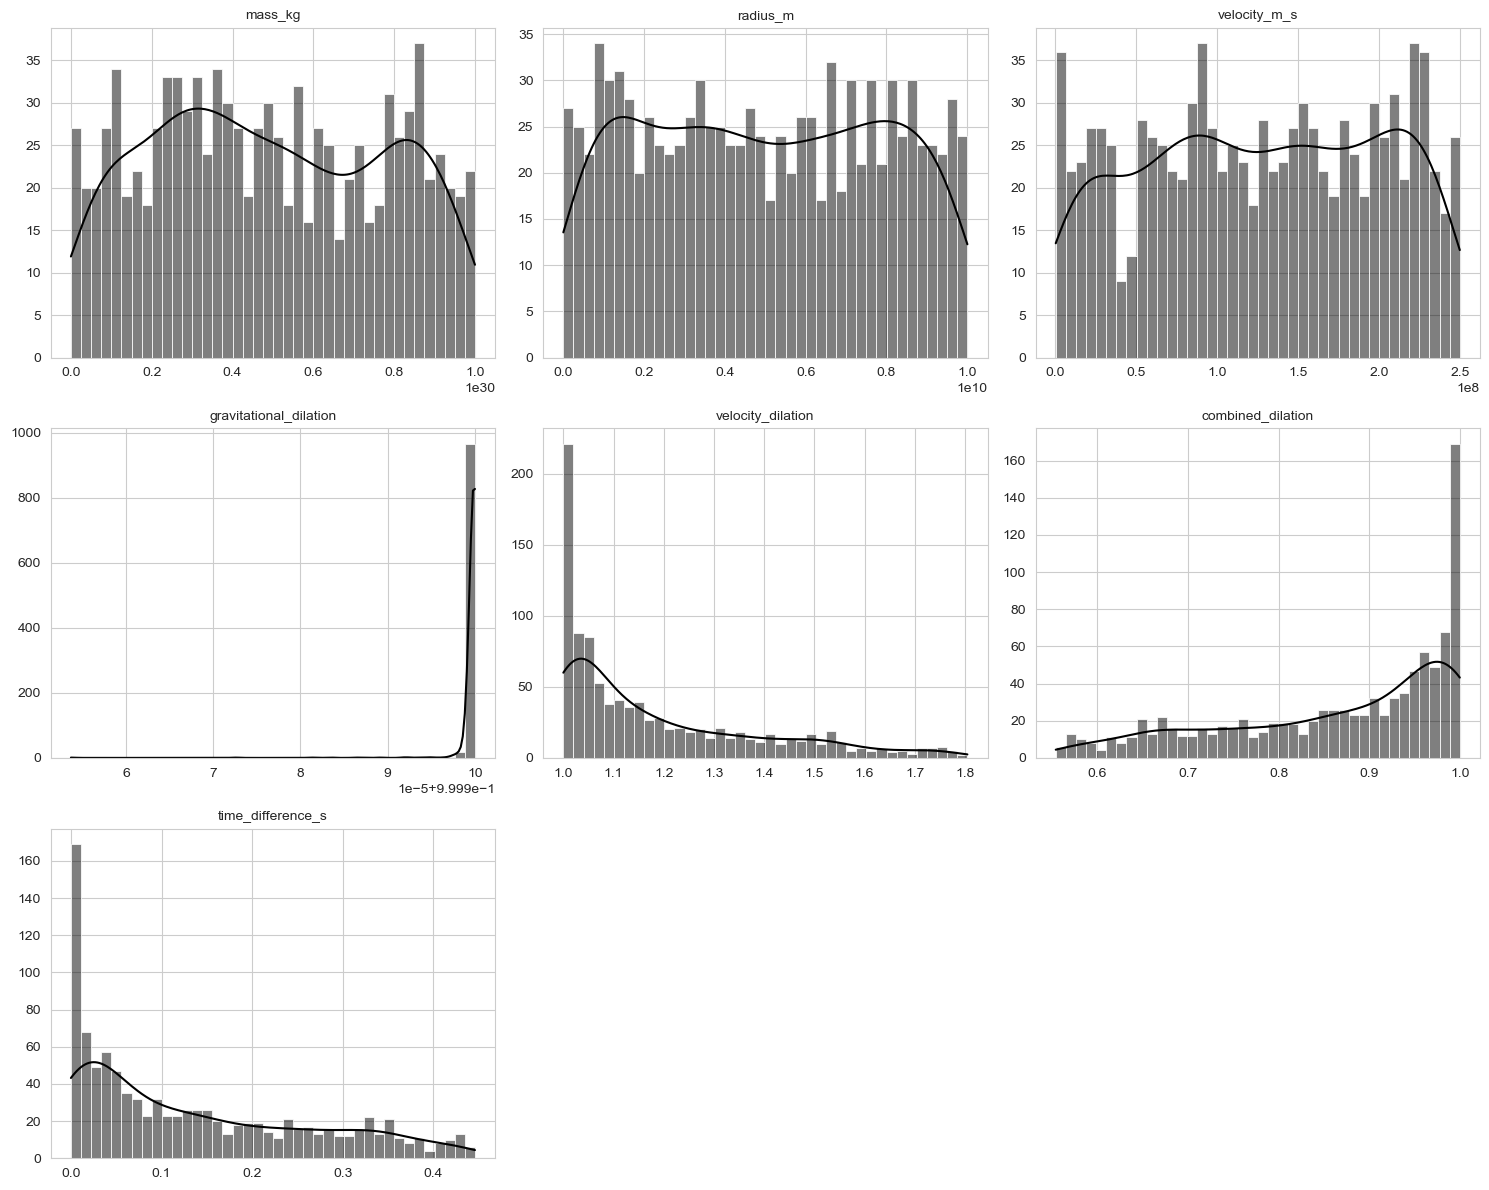

In [38]:
cols = [
    "mass_kg", "radius_m", "velocity_m_s",
    "gravitational_dilation", "velocity_dilation",
    "combined_dilation", "time_difference_s"
]

plt.figure(figsize=(15, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=40, kde=True, color="black")
    plt.title(f"{col}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


In [39]:
df.reset_index(drop=True, inplace=True)

In [40]:
df.to_csv(output_path, index=False)
df.head()

,mass_kg,radius_m,velocity_m_s,gravitational_dilation,velocity_dilation,combined_dilation,time_far_s,time_near_s,time_difference_s
0,6.620184e+29,5.356206e+09,8.128375e+07,1.0,1.038859,0.962595,1.0,0.962595,0.037405
1,8.862898e+29,8.749384e+09,1.207812e+08,1.0,1.092449,0.915374,1.0,0.915374,0.084626
2,2.994138e+29,2.869731e+09,6.245075e+07,1.0,1.022398,0.978093,1.0,0.978093,0.021907
3,4.302086e+29,6.169629e+09,1.997366e+08,1.0,1.340231,0.746140,1.0,0.746140,0.253860
4,3.116746e+29,2.609683e+09,1.579006e+08,1.0,1.176087,0.850277,1.0,0.850277,0.149723
